# Importation of Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt 
import os
from PIL import Image
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
#from keras.preprocessing.image import load_img
from keras.utils import np_utils
#from tensorflow.python.keras.layers import Conv2D,Flatten,MaxPooling2D,GlobalAveragePooling2D,Activation,Dropout, Dense
from tensorflow.keras.layers import BatchNormalization, Conv2D,Flatten,MaxPooling2D,GlobalAveragePooling2D,Activation,Dropout, Dense
#from tensorflow.python.keras import Sequential,backend,optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend
from tensorflow.keras import optimizers

# Data Separation

In [2]:
data = []
labels = []
parasite_data = os.listdir('/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/')
uninfected_data = os.listdir('/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/')

for img in parasite_data:
    try:
        img_file = plt.imread('/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/' + img)
        img_resize = cv2.resize(img_file, (50,50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        

for img in uninfected_data:
    try:
        img_file = plt.imread('/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/' + img)
        img_resize = cv2.resize(img_file, (50,50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

image_data = np.array(data)
labels = np.array(labels)
print("image_data:",len(image_data))
print("labels:",len(labels))

image_data: 27558
labels: 27558


# Visualization of Data

Parasitized Sample:



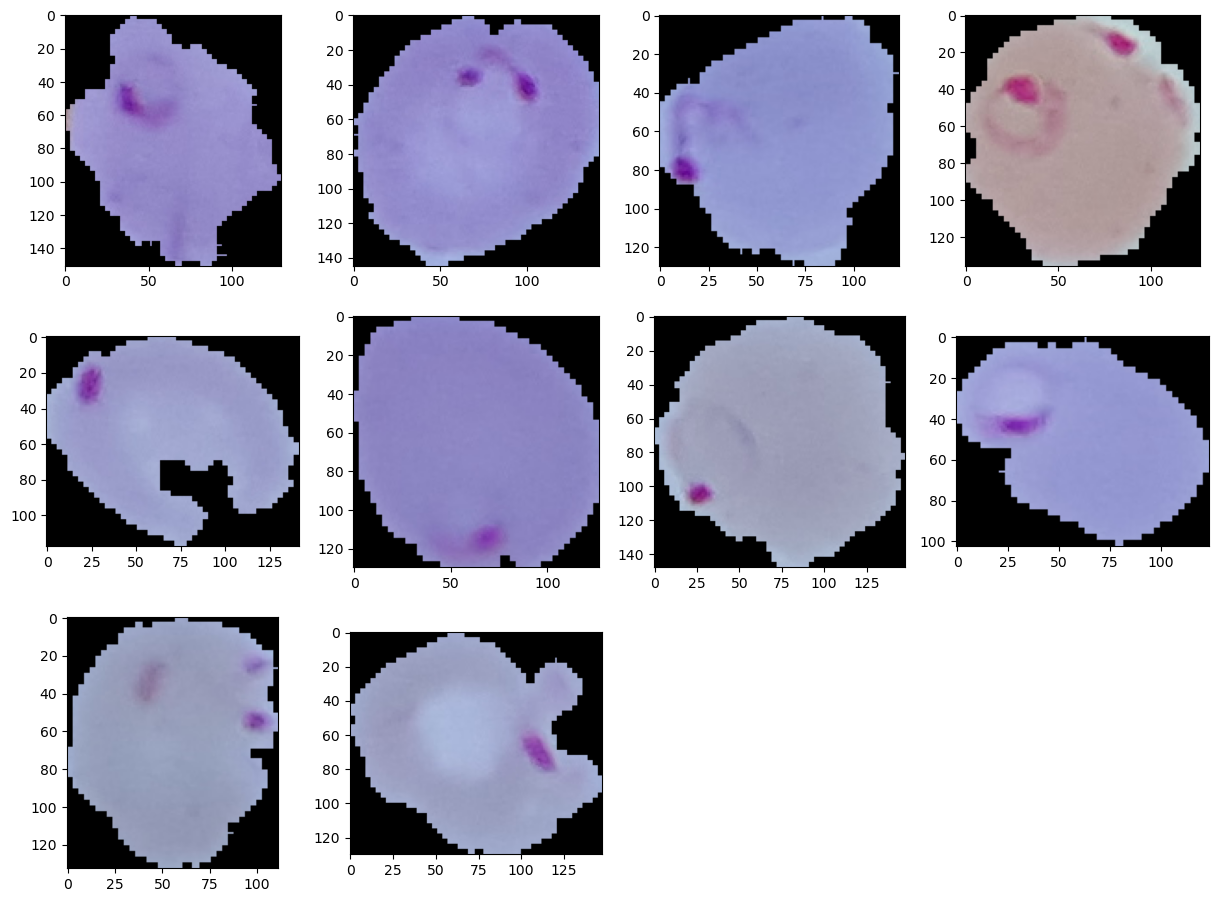

Uninfected Sample:



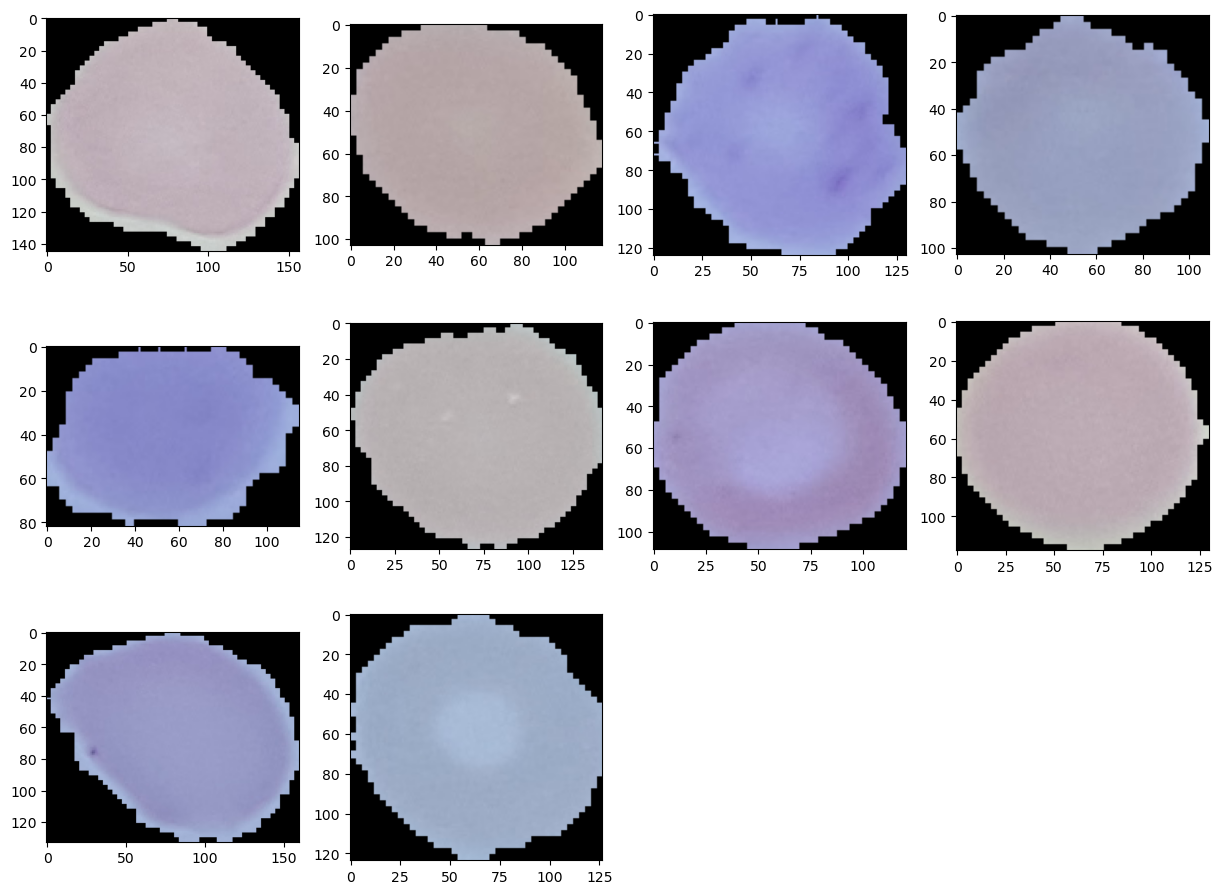

In [3]:
print("Parasitized Sample:\n")
plt.figure(figsize = (15,15))
for i in range(10):
    plt.subplot(4, 4, i+1)
    img = cv2.imread('/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/' + parasite_data[i])
    plt.imshow(img)
plt.show()

print("Uninfected Sample:\n")
plt.figure(figsize = (15,15))
for i in range(10):
    plt.subplot(4, 4, i+1)
    img = cv2.imread('/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/'+ uninfected_data[i])
    plt.imshow(img)
plt.show()

# Splitting into Training and Test Set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2,random_state = 0)

y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))

X_train: 22046
X_test: 5512
y_train: 22046
y_test: 5512


# CNN Model Development

In [5]:
model = Sequential()
    
inputShape = (50, 50, 3)

if backend.image_data_format() == 'channels_first':
          inputShape = (3, 50, 50)
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Flatten())
    
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))
    
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0

# CNN Model Compilation

In [6]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Fitting of Model

In [7]:
model.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30


2023-03-16 17:24:56.553175: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


689/689 [==============================] - 14s 6ms/step - loss: 0.5762 - accuracy: 0.7532
Epoch 2/30
689/689 [==============================] - 4s 6ms/step - loss: 0.2283 - accuracy: 0.9157
Epoch 3/30
689/689 [==============================] - 4s 6ms/step - loss: 0.1846 - accuracy: 0.9352
Epoch 4/30
689/689 [==============================] - 5s 7ms/step - loss: 0.1725 - accuracy: 0.9404
Epoch 5/30
689/689 [==============================] - 4s 6ms/step - loss: 0.1625 - accuracy: 0.9452
Epoch 6/30
689/689 [==============================] - 4s 6ms/step - loss: 0.1637 - accuracy: 0.9466
Epoch 7/30
689/689 [==============================] - 4s 6ms/step - loss: 0.1576 - accuracy: 0.9500
Epoch 8/30
689/689 [==============================] - 4s 6ms/step - loss: 0.1543 - accuracy: 0.9496
Epoch 9/30
689/689 [==============================] - 4s 6ms/step - loss: 0.1526 - accuracy: 0.9491
Epoch 10/30
689/689 [==============================] - 4s 6ms/step - loss: 0.1423 - accuracy: 0.9521
Epoch 11/

# Model Evaluation

In [8]:
predict = model.evaluate(X_test, y_test)
print("Loss: ",predict[0])
print("Accuracy: ",predict[1]*100)

173/173 [==============================] - 1s 4ms/step - loss: 0.1245 - accuracy: 0.9583
Loss:  0.12454906851053238
Accuracy:  95.82728743553162


# Saving Model

In [9]:
model.save('a95e30model.h5')
from tensorflow.keras.models import load_model
saved_model = load_model('a95e30model.h5')
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0

# Importing VGG-19

In [10]:
from tensorflow.keras.applications import VGG19
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(50, 50, 3))

for layer in vgg19.layers:
    layer.trainable = False


80134624/80134624 [==============================] - 1s 0us/step


# Create a new Model based on VGG-19

In [11]:
vgg_model = Sequential()
vgg_model.add(vgg19)
vgg_model.add(Flatten())
vgg_model.add(Dense(2, activation='softmax'))

# Compile VGG Model

In [12]:
vgg_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train VGG Model

In [13]:
vgg_model.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
689/689 [==============================] - 9s 12ms/step - loss: 0.4037 - accuracy: 0.8342
Epoch 2/30
689/689 [==============================] - 8s 12ms/step - loss: 0.3103 - accuracy: 0.8761
Epoch 3/30
689/689 [==============================] - 8s 12ms/step - loss: 0.2898 - accuracy: 0.8822
Epoch 4/30
689/689 [==============================] - 8s 12ms/step - loss: 0.2792 - accuracy: 0.8882
Epoch 5/30
689/689 [==============================] - 8s 12ms/step - loss: 0.2726 - accuracy: 0.8921
Epoch 6/30
689/689 [==============================] - 8s 12ms/step - loss: 0.2669 - accuracy: 0.8945
Epoch 7/30
689/689 [==============================] - 8s 12ms/step - loss: 0.2629 - accuracy: 0.8961
Epoch 8/30
689/689 [==============================] - 8s 12ms/step - loss: 0.2605 - accuracy: 0.8960
Epoch 9/30
689/689 [==============================] - 8s 12ms/step - loss: 0.2572 - accuracy: 0.8978
Epoch 10/30
689/689 [==============================] - 8s 12ms/step - loss: 0.2554 - accura

# Evaluate VGG Model

In [14]:
predict_vgg = vgg_model.evaluate(X_test, y_test)
print("Loss: ",predict_vgg[0])
print("Accuracy: ",predict_vgg[1]*100)

173/173 [==============================] - 2s 12ms/step - loss: 0.2497 - accuracy: 0.9026
Loss:  0.24966195225715637
Accuracy:  90.2576208114624


# Saving Transfer Learning Model

In [15]:
vgg_model.save('vggmod.h5')
saved_vggmodel = load_model('vggmod.h5')
saved_vggmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 20,025,410
Trainable params: 1,026
Non-trainable params: 20,024,384
_________________________________________________________________
